<a href="https://colab.research.google.com/github/shubhangi-singh21/Data-Science/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uploading dataset

In [ ]:
# importing libraries
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

The dataset considered is the [Daily Demand Forecasting Orders Data Set](https://archive.ics.uci.edu/ml/datasets/Daily+Demand+Forecasting+Orders).

In [ ]:
# reading the dataset

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00409/Daily_Demand_Forecasting_Orders.csv")

In [ ]:
df.head()

,Week of the month (first week,second,third,fourth or fifth week;Day of the week (Monday to Friday);Non-urgent order;Urgent order;Order type A;Order type B;Order type C;Fiscal sector orders;Orders from the traffic controller sector;Banking orders (1);Banking orders (2);Banking orders (3);Target (Total orders)
0,1;4;316.307;223.270;61.543;175.586;302.448;0;6...,NaN,NaN,NaN
1,1;5;128.633;96.042;38.058;56.037;130.580;0;404...,NaN,NaN,NaN
2,1;6;43.651;84.375;21.826;25.125;82.461;1.386;1...,NaN,NaN,NaN
3,2;2;171.297;127.667;41.542;113.294;162.284;18....,NaN,NaN,NaN
4,2;3;90.532;113.526;37.679;56.618;116.220;6.459...,NaN,NaN,NaN


In [ ]:
# reading the dataset

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00409/Daily_Demand_Forecasting_Orders.csv", sep=';')

In [ ]:
df.head()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


# Exploratory Data Analysis

In [ ]:
df.rename(columns={'Week of the month (first week, second, third, fourth or fifth week':'Week', 'Day of the week (Monday to Friday)':'Day'}, inplace=True)

In [ ]:
df.shape

(60, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Week                                       60 non-null     int64  
 1   Day                                        60 non-null     int64  
 2   Non-urgent order                           60 non-null     float64
 3   Urgent order                               60 non-null     float64
 4   Order type A                               60 non-null     float64
 5   Order type B                               60 non-null     float64
 6   Order type C                               60 non-null     float64
 7   Fiscal sector orders                       60 non-null     float64
 8   Orders from the traffic controller sector  60 non-null     int64  
 9   Banking orders (1)                         60 non-null     int64  
 10  Banking orders (2)          

Observation : No missing values present, proper datatypes.

In [ ]:
df.describe()

,Week,Day,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,3.016667,4.033333,172.554933,118.920850,52.112217,109.229850,139.531250,77.396133,44504.350000,46640.833333,79401.483333,23114.633333,300.873317
std,1.282102,1.401775,69.505788,27.170929,18.829911,50.741388,41.442932,186.502470,12197.905134,45220.736293,40504.420041,13148.039829,89.602041
min,1.000000,2.000000,43.651000,77.371000,21.826000,25.125000,74.372000,0.000000,11992.000000,3452.000000,16411.000000,7679.000000,129.412000
25%,2.000000,3.000000,125.348000,100.888000,39.456250,74.916250,113.632250,1.243250,34994.250000,20130.000000,50680.500000,12609.750000,238.195500
50%,3.000000,4.000000,151.062500,113.114500,47.166500,99.482000,127.990000,7.831500,44312.000000,32527.500000,67181.000000,18011.500000,288.034500
75%,4.000000,5.000000,194.606500,132.108250,58.463750,132.171000,160.107500,20.360750,52111.750000,45118.750000,94787.750000,31047.750000,334.237250
max,5.000000,6.000000,435.304000,223.270000,118.178000,267.342000,302.448000,865.000000,71772.000000,210508.000000,188411.000000,73839.000000,616.453000


Observations : Ranges are different for different columns, needs scaling.

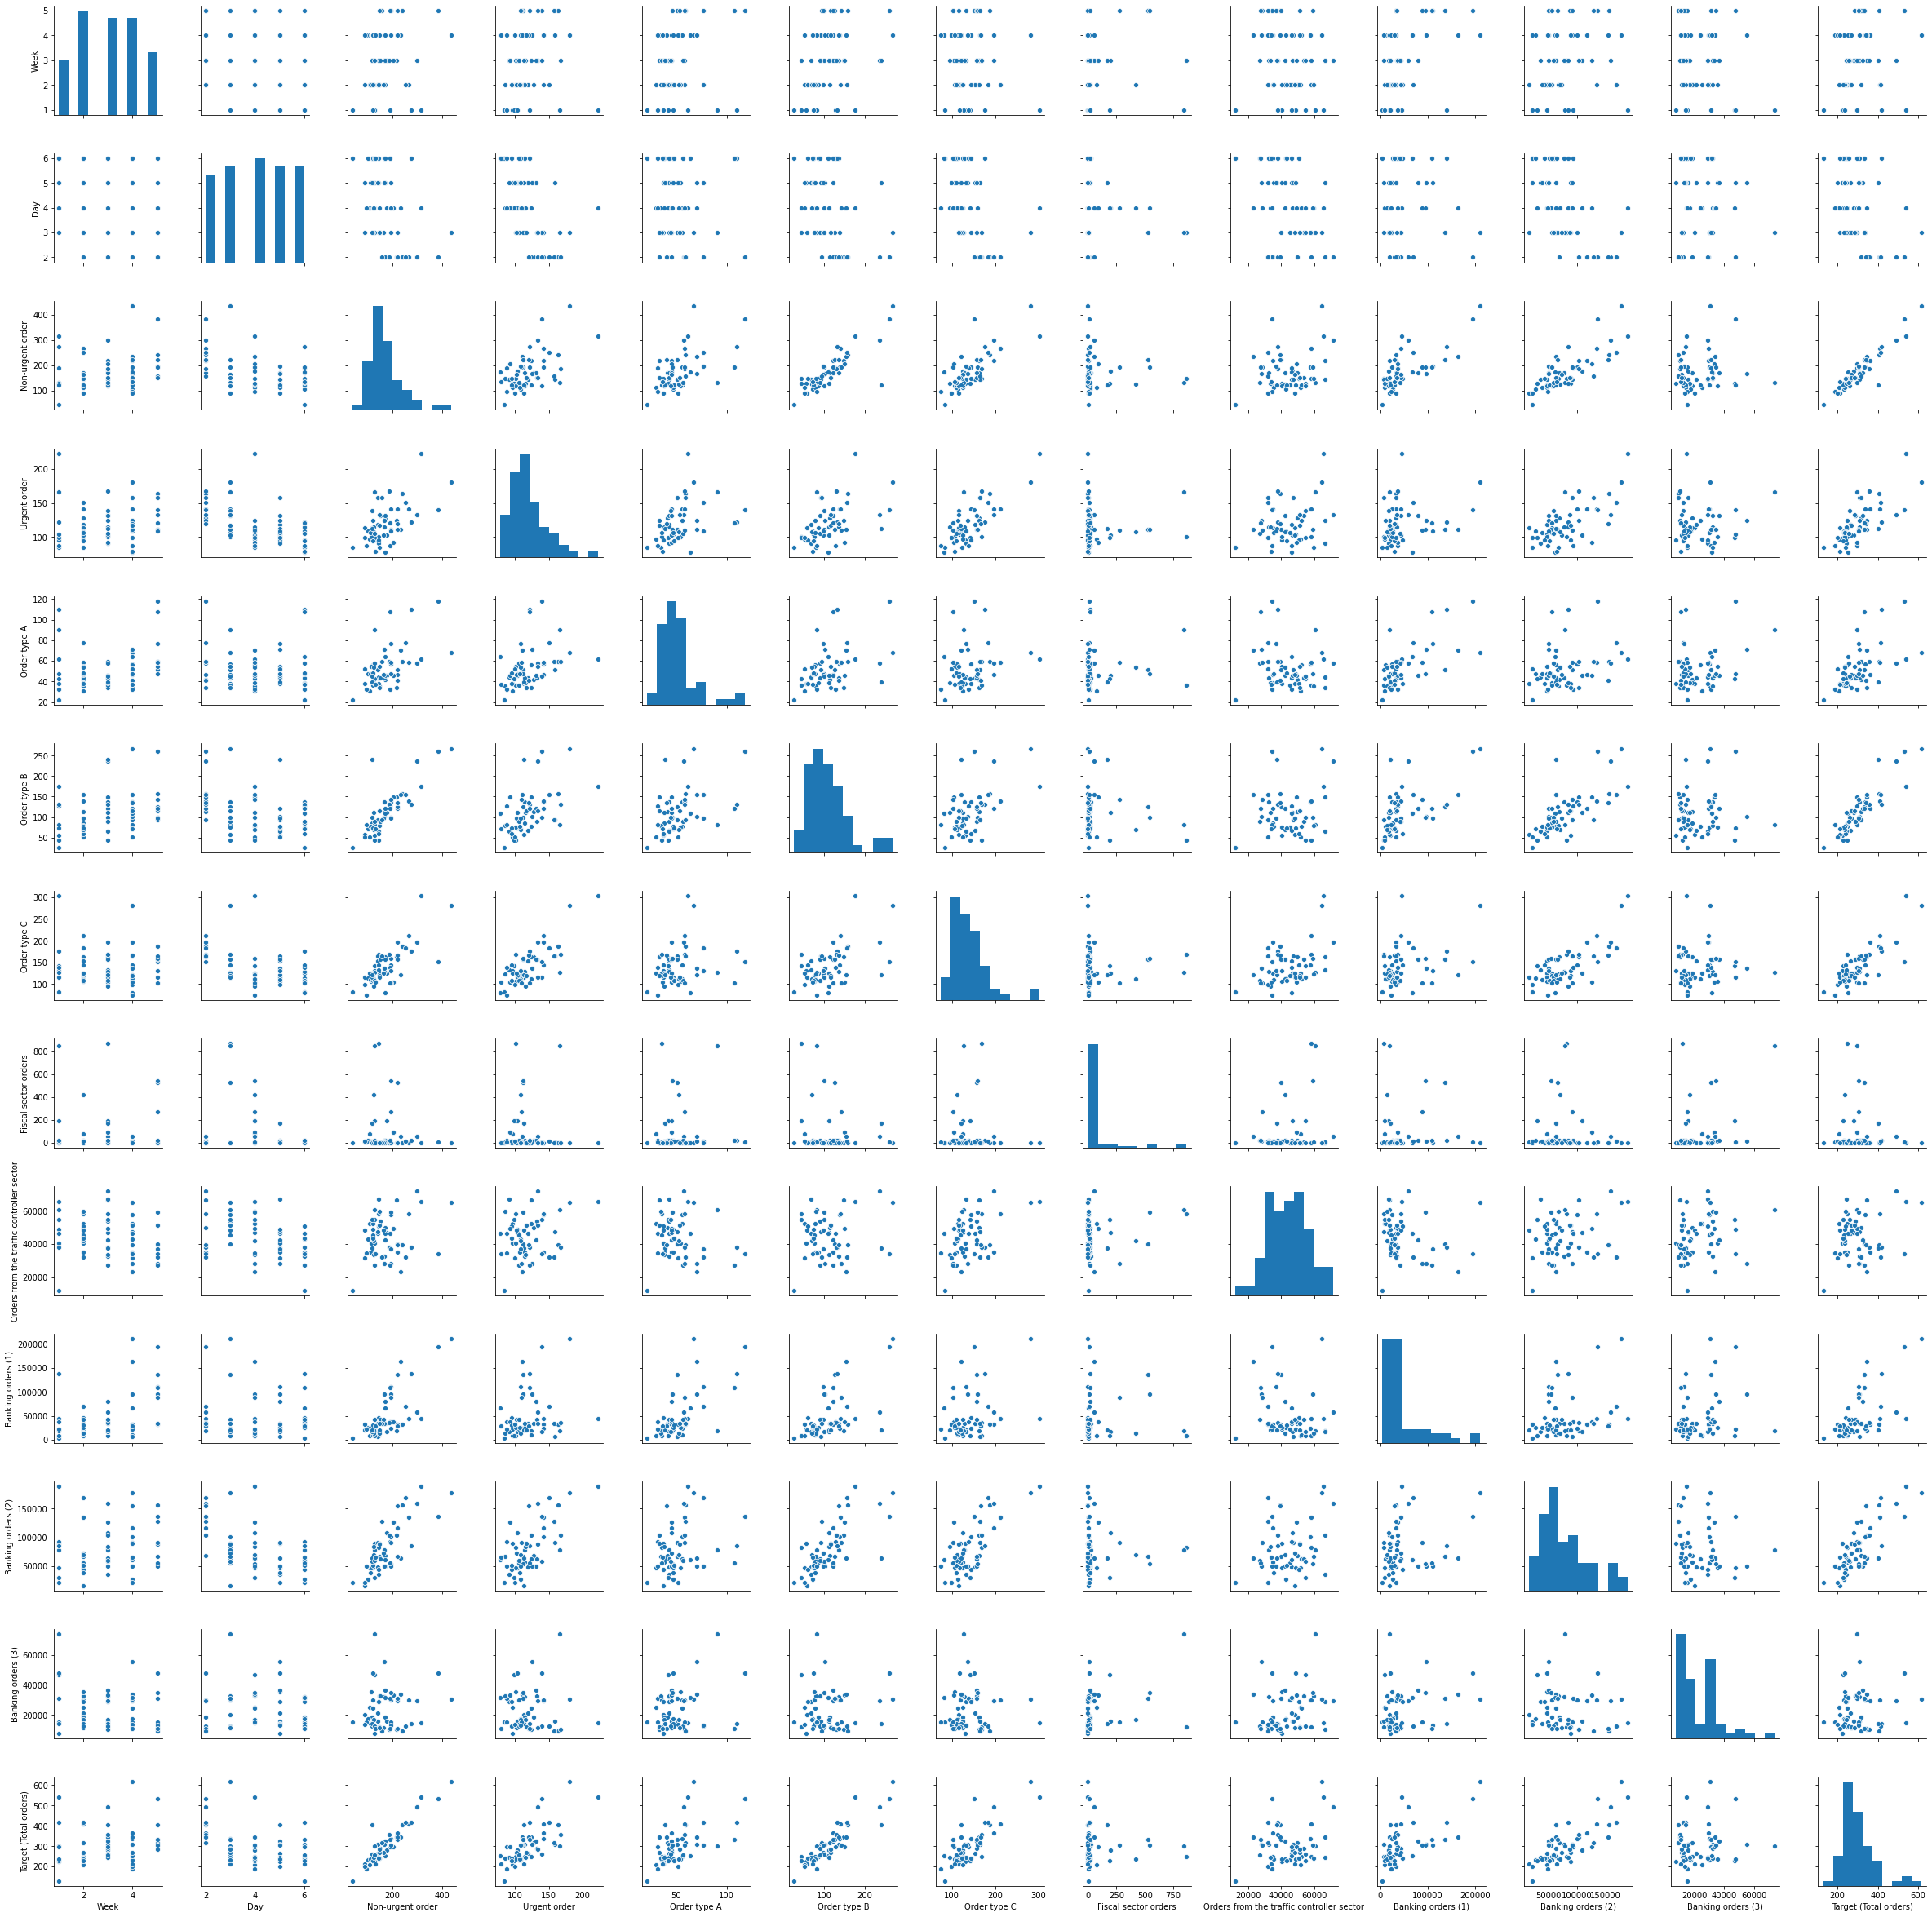

In [ ]:
sns.pairplot(df)

Observation : 

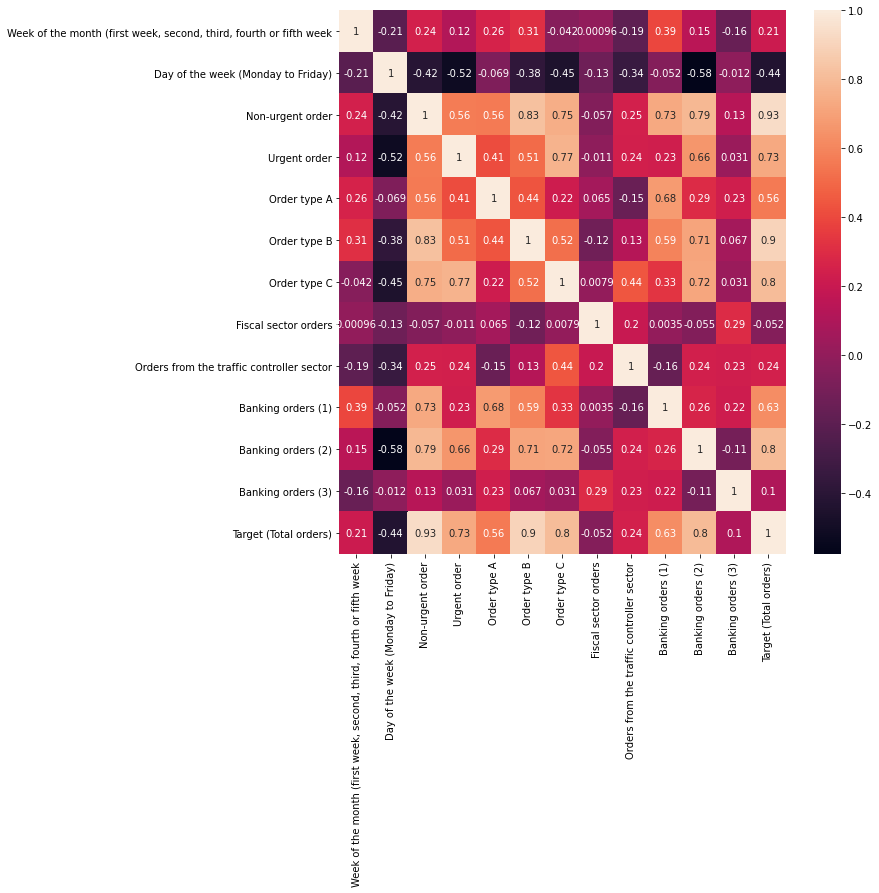

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)


Observation :

In [ ]:
df.columns

Index(['Week of the month (first week, second, third, fourth or fifth week',
       'Day of the week (Monday to Friday)', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')

In [ ]:
df1 = df[["Non-urgent order", 'Order type B', 'Order type C', 'Banking orders (2)', "Target (Total orders)"]].copy()
df1.head()

,Non-urgent order,Order type B,Order type C,Banking orders (2),Target (Total orders)
0,316.307,175.586,302.448,188411,539.577
1,128.633,56.037,130.580,89461,224.675
2,43.651,25.125,82.461,21305,129.412
3,171.297,113.294,162.284,69054,317.120
4,90.532,56.618,116.220,16411,210.517


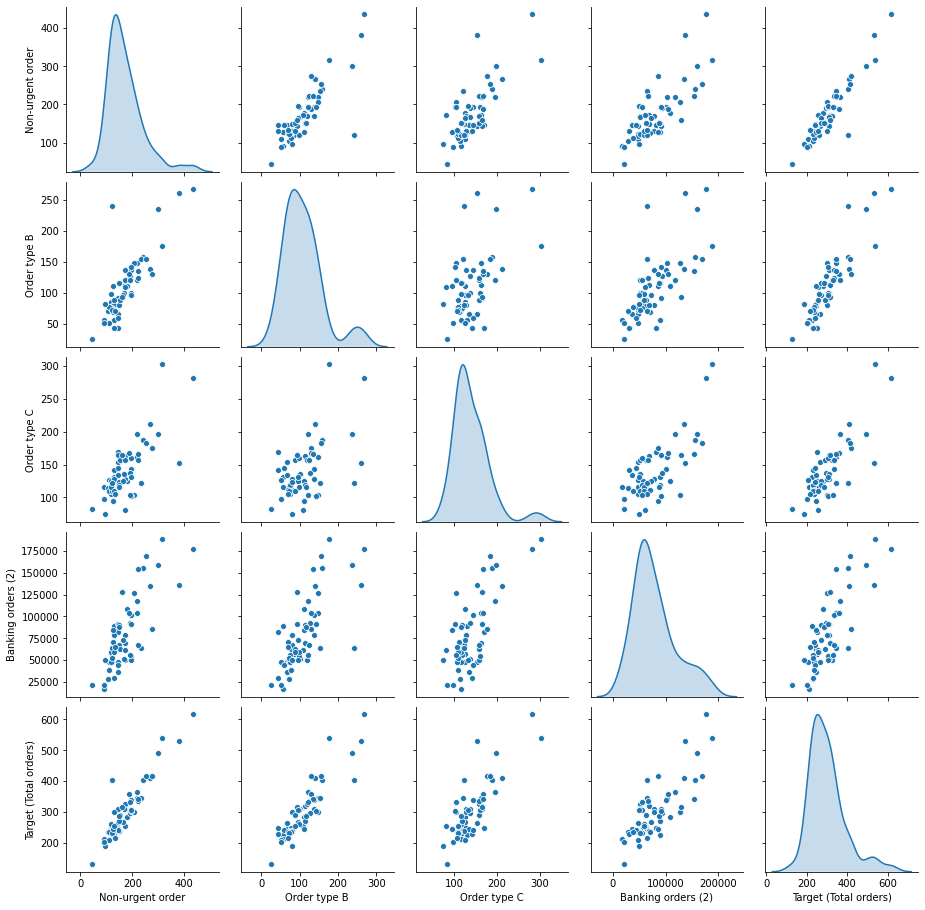

In [ ]:
sns.pairplot(df1, diag_kind='kde')

Observation : 

In [ ]:
df.Week.value_counts()

2    15
4    14
3    14
5     9
1     8
Name: Week, dtype: int64

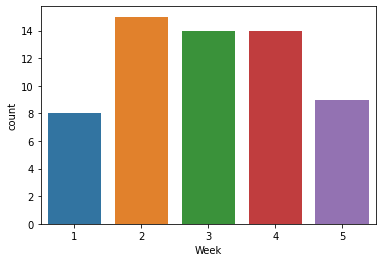

In [ ]:
sns.countplot(df.Week)

Observation :  

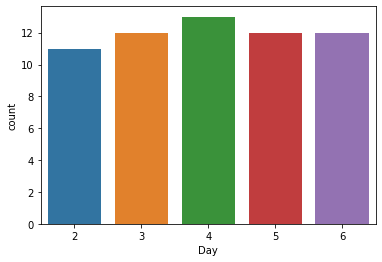

In [ ]:
sns.countplot(df.Day)

Onservation : 

# One hot encoding

It refers to splitting the column which contains numerical categorical data to many columns depending on the number of categories present in that column. Each column contains “0” or “1” corresponding to which column it has been placed.

For eg.,

 Country |
 ---|
 India |
 Nepal |
 Bhutan | 

 Country_India | Country_Nepal | Country_Bhutan 
 ---|:---|:---
 1 | 0 | 0
 0 | 1 | 0
 0 | 0 | 1 

In [ ]:
df1 = pd.get_dummies(df, columns=["Week", "Day"])

In [ ]:
df1.head()

,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders),Week_1,Week_2,Week_3,Week_4,Week_5,Day_2,Day_3,Day_4,Day_5,Day_6
0,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577,1,0,0,0,0,0,0,1,0,0
1,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675,1,0,0,0,0,0,0,0,1,0
2,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412,1,0,0,0,0,0,0,0,0,1
3,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120,0,1,0,0,0,1,0,0,0,0
4,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517,0,1,0,0,0,0,1,0,0,0


In [ ]:
df1.shape

(60, 21)

# Train-test split

In [ ]:
y = df1["Target (Total orders)"].copy()
y.head()

0    539.577
1    224.675
2    129.412
3    317.120
4    210.517
Name: Target (Total orders), dtype: float64

In [ ]:
X = df1.drop("Target (Total orders)", axis=1)
X.head()

,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Week_1,Week_2,Week_3,Week_4,Week_5,Day_2,Day_3,Day_4,Day_5,Day_6
0,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,1,0,0,0,0,0,0,1,0,0
1,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,1,0,0,0,0,0,0,0,1,0
2,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,1,0,0,0,0,0,0,0,0,1
3,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,0,1,0,0,0,1,0,0,0,0
4,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,0,1,0,0,0,0,1,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.head()

,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Week_1,Week_2,Week_3,Week_4,Week_5,Day_2,Day_3,Day_4,Day_5,Day_6
43,112.246,106.641,47.399,77.610,109.715,15.837,35316,25876,38646,13989,0,1,0,0,0,0,0,0,1,0
19,131.067,166.649,90.476,80.509,127.575,844.000,60543,19141,78378,73839,1,0,0,0,0,0,1,0,0,0
34,168.179,125.119,71.068,100.544,136.033,14.347,28072,95989,50763,55445,0,0,0,1,0,0,0,0,1,0
58,196.555,108.395,76.763,96.478,131.709,0.000,37011,109931,50112,12957,0,0,0,0,1,0,0,0,1,0
25,148.139,85.310,35.576,79.997,123.253,5.377,59686,14188,67617,32319,0,1,0,0,0,0,0,1,0,0


In [ ]:
print(len(X_train))
print(len(X_test))

40
20


In [ ]:
X_train.shape

(40, 20)

# Scaling

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Linear Regression
##Multivariate Linear Regression

$ y = \beta_0 + \beta_1*X_1 + \beta_2*X_2 + ... + \beta_n*X_n$

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_test, y_test)

In [ ]:
reg.coef_

In [ ]:
reg.coef_.shape

In [ ]:
reg.intercept_

In [ ]:
mean_squared_error(y_test, reg.predict(X_test))

In [ ]:
reg.predict(X_test)

# Regression with polynomial features



For one feature variable X - 

$ y = \beta_0 + \beta_1*X + \beta_2*X^2 + \beta_3*X^3 + ... + \beta_n*X^n$

Polynomial Regression with degree 2 for 2 features - 

$ y = \beta_0 + \beta_1*X_1 + \beta_2*X_1^2 + \beta_3*X_1*X_2 + \beta_4*X_2 + \beta_5*X_2^2 $

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
poly = PolynomialFeatures()

X_train1 = poly.fit_transform(X_train)
X_test1 = poly.fit_transform(X_test)

In [ ]:
len(X_train1[0])

In [ ]:
reg = LinearRegression().fit(X_train1, y_train)

In [ ]:
reg.score(X_test1, y_test)

In [ ]:
import pickle

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))